<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Dimensionality Reduction Using PCA</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans


pd.set_option('Display.max_rows', None)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [3]:
df.shape

(178, 14)

In [4]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.Type.unique()

array([1, 2, 3], dtype=int64)

In [7]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### we need to standardize the data we use min max scaler

In [8]:
scaler  = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
scaled_df.drop(['Type'], axis = 1, inplace = True)
scaled_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076


### Applying PCA algorithm

In [9]:
pca = PCA(n_components=13)
pca.fit(scaled_df)


PCA(n_components=13)

In [10]:
scores  = pca.transform(scaled_df)
scores_df = pd.DataFrame(scores, columns=['pc1','pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13'])
scores_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172
5,-0.608190,-0.487519,-0.075433,-0.184152,-0.068730,0.027011,0.073993,-0.113498,-0.001261,-0.037338,-0.069653,0.012089,0.032058
6,-0.544047,-0.300196,-0.105075,-0.043006,-0.239967,-0.097480,-0.061164,0.104836,-0.124163,0.158094,-0.016722,-0.078029,-0.070831
7,-0.474357,-0.298197,-0.002821,-0.086235,-0.069381,-0.348479,-0.034282,-0.038330,0.019486,0.184833,0.017735,0.042916,-0.007966
8,-0.500432,-0.307603,-0.230494,-0.024397,-0.219723,0.059622,-0.044957,0.157878,0.103823,-0.061577,-0.113927,-0.065824,0.017768
9,-0.627518,-0.206328,-0.114148,0.059695,-0.049682,0.089690,-0.185331,-0.001815,-0.000133,0.084058,0.089520,0.030431,0.000636


In [11]:
scores_df = pd.concat([scores_df,df.Type], axis=1)
scores_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,Type
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723,1
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249,1
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164,1
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921,1
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172,1
5,-0.608190,-0.487519,-0.075433,-0.184152,-0.068730,0.027011,0.073993,-0.113498,-0.001261,-0.037338,-0.069653,0.012089,0.032058,1
6,-0.544047,-0.300196,-0.105075,-0.043006,-0.239967,-0.097480,-0.061164,0.104836,-0.124163,0.158094,-0.016722,-0.078029,-0.070831,1
7,-0.474357,-0.298197,-0.002821,-0.086235,-0.069381,-0.348479,-0.034282,-0.038330,0.019486,0.184833,0.017735,0.042916,-0.007966,1
8,-0.500432,-0.307603,-0.230494,-0.024397,-0.219723,0.059622,-0.044957,0.157878,0.103823,-0.061577,-0.113927,-0.065824,0.017768,1
9,-0.627518,-0.206328,-0.114148,0.059695,-0.049682,0.089690,-0.185331,-0.001815,-0.000133,0.084058,0.089520,0.030431,0.000636,1


In [12]:
loadings = pca.components_
loadings = pd.DataFrame(loadings, columns= scores_df.columns[:13], index = df.columns[1:])
loadings

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
Alcohol,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
Malic,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
Ash,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968
Alcalinity,-0.040328,0.486032,-0.241976,-0.081694,0.015880,-0.052643,-0.027033,-0.709095,0.076574,-0.026322,-0.352498,0.082062,-0.229793
Magnesium,-0.278010,-0.412890,0.286394,0.418305,0.470899,-0.018030,0.002573,-0.360038,0.148666,0.200582,-0.077162,-0.263396,-0.076556
Phenols,-0.137254,-0.213103,-0.300965,-0.135610,-0.312519,0.283604,0.147045,0.197232,0.503115,0.388032,-0.283041,-0.167278,-0.276349
Flavanoids,-0.275352,0.310302,-0.171805,-0.297556,0.520419,-0.066524,-0.050698,0.214889,0.466207,-0.212596,0.193315,-0.224561,0.188372
Nonflavanoids,0.555031,-0.076928,-0.123460,0.270756,-0.019937,-0.413384,-0.156461,-0.034232,0.483470,-0.036924,0.295372,0.102303,-0.260229
Proanthocyanins,0.326687,-0.014471,-0.044362,-0.204924,0.471910,0.351232,0.088960,0.122889,-0.284054,-0.023708,0.068775,-0.060197,-0.624839
Color,-0.035912,-0.237073,-0.056899,-0.132503,0.325868,-0.263006,-0.199445,0.236775,0.018743,0.039143,-0.534248,0.602194,0.023829


In [13]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [14]:
pca.explained_variance_

array([0.2200922 , 0.10246084, 0.04624247, 0.04011226, 0.03005877,
       0.02516286, 0.01978926, 0.01301012, 0.01228411, 0.01215769,
       0.0074605 , 0.00687688, 0.00440241])

In [15]:
explained_variance = np.insert(pca.explained_variance_, 0,0)
explained_variance

array([0.        , 0.2200922 , 0.10246084, 0.04624247, 0.04011226,
       0.03005877, 0.02516286, 0.01978926, 0.01301012, 0.01228411,
       0.01215769, 0.0074605 , 0.00687688, 0.00440241])

In [16]:
cumulative_variance = np.cumsum(np.round(explained_variance,decimals = 4)*100)
cumulative_variance

array([ 0.  , 22.01, 32.26, 36.88, 40.89, 43.9 , 46.42, 48.4 , 49.7 ,
       50.93, 52.15, 52.9 , 53.59, 54.03])

In [17]:
pc = pd.DataFrame(['', 'pc1',' pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13'], columns=['PC'])
explained_variance = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance = pd.DataFrame(cumulative_variance, columns=['cumulative_variance'])

ttvariance = pd.concat([pc, explained_variance, cumulative_variance], axis = 1)
ttvariance

,PC,Explained Variance,cumulative_variance
0,,0.000000,0.00
1,pc1,0.220092,22.01
2,pc2,0.102461,32.26
3,pc3,0.046242,36.88
4,pc4,0.040112,40.89
5,pc5,0.030059,43.90
6,pc6,0.025163,46.42
7,pc7,0.019789,48.40
8,pc8,0.013010,49.70
9,pc9,0.012284,50.93


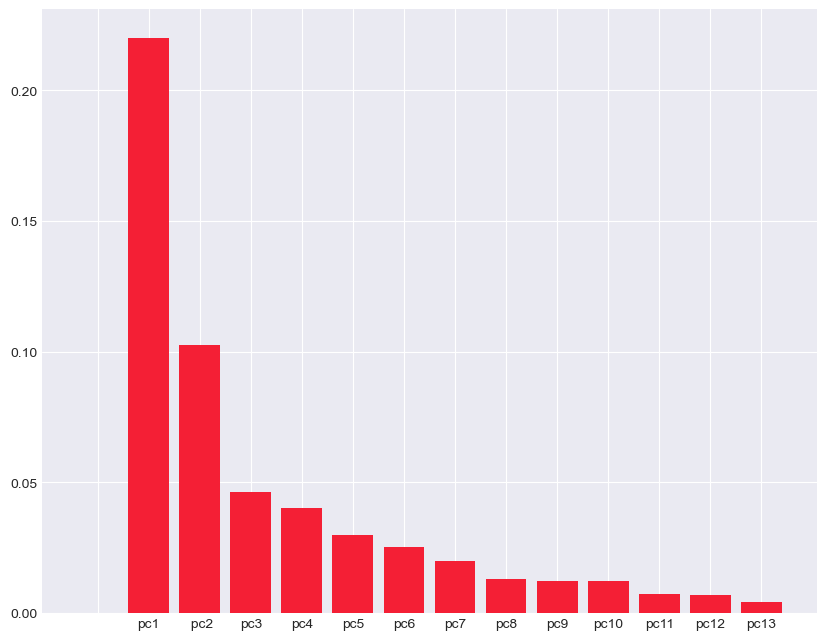

In [18]:
plt.figure(figsize=(10,8), dpi = 100)
plt.bar(ttvariance.PC, ttvariance['Explained Variance'], color = '#f41f35')
plt.show()

### Pc1, pc2, pc3 explain the most amount of data 

In [19]:
pca_df = pd.concat([scores_df.pc1, scores_df.pc2, scores_df.pc3, scores_df.Type], axis=1)
pca_df

,pc1,pc2,pc3,Type
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
5,-0.608190,-0.487519,-0.075433,1
6,-0.544047,-0.300196,-0.105075,1
7,-0.474357,-0.298197,-0.002821,1
8,-0.500432,-0.307603,-0.230494,1
9,-0.627518,-0.206328,-0.114148,1


### Sweet visualization

In [27]:
import plotly.express as px
plt.figure(figsize=(10,10), dpi = 200)
fig = px.scatter_3d(pca_df, x='pc1', y='pc2', z='pc3',
              color='Type')
fig.show()

<Figure size 2000x2000 with 0 Axes>

In [ ]:
Clustering using 